<a href="https://colab.research.google.com/github/iannstronaut/WildFire/blob/Experimental/Wildfire_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire with CNN

In [ ]:
import os
from PIL import Image
from PIL import ImageFile
import numpy as np

# Izinkan pemuatan gambar terpotong
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Path ke folder Wildfire
base_dir = "./Wildfire/train"

# Inisialisasi array untuk menyimpan gambar dan label
data = []

# Loop untuk membaca gambar dari subfolder 'wildfire' dan 'nowildfire'
for label in ['wildfire', 'nowildfire']:
    folder_path = os.path.join(base_dir, label)  # Path ke subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)

            # Buka gambar menggunakan PIL
            img = Image.open(img_path)

            img = img.resize((50, 50))

            # Konversi gambar ke array numpy
            img_np = np.array(img)

            # Tambahkan gambar dan label ke array data
            data.append({
                'label': label,
                'image': img_np
            })

# Jumlah gambar yang berhasil dimuat
print(f"{len(data)} images loaded from folders 'wildfire' and 'nowildfire'.")


30250 images loaded from folders 'wildfire' and 'nowildfire'.


In [ ]:
base_dir = "./Wildfire/test"

# Inisialisasi array untuk menyimpan gambar dan label
test = []

# Loop untuk membaca gambar dari subfolder 'wildfire' dan 'nowildfire'
for label in ['wildfire', 'nowildfire']:
    folder_path = os.path.join(base_dir, label)  # Path ke subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)

            # Buka gambar menggunakan PIL
            img = Image.open(img_path)

            img = img.resize((50, 50))

            # Konversi gambar ke array numpy
            img_np = np.array(img)

            # Tambahkan gambar dan label ke array data
            test.append({
                'label': label,
                'image': img_np
            })

# Jumlah gambar yang berhasil dimuat
print(f"{len(test)} images loaded from folders 'wildfire' and 'nowildfire'.")


6300 images loaded from folders 'wildfire' and 'nowildfire'.


In [ ]:
X_train = np.array([entry['image'] for entry in data])
y_train = np.array([entry['label'] for entry in data])

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

2024-10-05 12:38:59.423762: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 12:38:59.663565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 12:38:59.920041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 12:39:00.108735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 12:39:00.163968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 12:39:00.527485: I tensorflow/core/platform/cpu_feature_gu

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)
# Ubah label menjadi kategorikal
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (24200, 50, 50, 3), Shape of X_test: (6050, 50, 50, 3)
Shape of y_train: (24200, 2), Shape of y_test: (6050, 2)


In [ ]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularisasi
model.add(Dense(2, activation='softmax'))  # 2 kelas (wildfire, nowildfire)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/home/cloudide/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 89s 145ms/step - accuracy: 0.8344 - loss: 1.0424 - val_accuracy: 0.9147 - val_loss: 0.2148
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 76s 125ms/step - accuracy: 0.9090 - loss: 0.2340 - val_accuracy: 0.9252 - val_loss: 0.1910
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.9167 - loss: 0.2167 - val_accuracy: 0.9275 - val_loss: 0.1803
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.9215 - loss: 0.2111 - val_accuracy: 0.9349 - val_loss: 0.1710
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.9261 - loss: 0.1958 - val_accuracy: 0.9324 - val_loss: 0.1715
Epoch 6/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 73s 121ms/step - accuracy: 0.9342 - loss: 0.1747 - val_accuracy: 0.9298 - val_loss: 0.1854
Epoch 7/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.9362 - loss: 0.1700 - val_accuracy: 0.9314 - val_loss: 0.1778
Epoch 8/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 73s 121ms/step - accuracy: 0.9414 - loss: 0

In [ ]:
# Evaluasi model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_.astype(str)))

190/190 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step
Akurasi model: 0.93
              precision    recall  f1-score   support

  nowildfire       0.91      0.95      0.93      2886
    wildfire       0.95      0.91      0.93      3164

    accuracy                           0.93      6050
   macro avg       0.93      0.93      0.93      6050
weighted avg       0.93      0.93      0.93      6050



In [ ]:
# Pastikan gambar memiliki ukuran yang sesuai dan labelnya benar
X_test_another = np.array([entry['image'] for entry in test])
y_test_another = np.array([entry['label'] for entry in test])

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y_test_another)  # Ini harus dilakukan pada data yang sama
y_test_classes = y_encoded  # Simpan kelas y_test yang sudah diencode

# Prediksi
y_pred = model.predict(X_test_another)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_.astype(str)))


197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step
Akurasi model: 0.94
              precision    recall  f1-score   support

  nowildfire       0.90      0.98      0.94      2820
    wildfire       0.98      0.91      0.94      3480

    accuracy                           0.94      6300
   macro avg       0.94      0.94      0.94      6300
weighted avg       0.94      0.94      0.94      6300



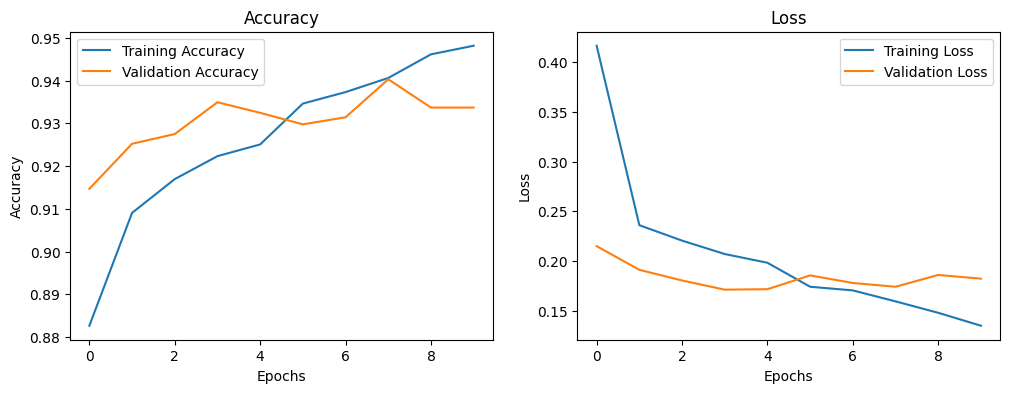

In [ ]:
# Grafik akurasi dan loss
plt.figure(figsize=(12, 4))

# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
